## Example with the class ClassificationRF defined in classyRF.py

In [1]:
import classyRF
import numpy as np
import matplotlib.pyplot as plt


C:\Users\marin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import importlib
importlib.reload(classyRF)

<module 'classyRF' from 'C:\\Users\\marin\\Desktop\\ML_workingGroup\\classy_RF\\classyRF.py'>

In [2]:
path = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\RM_dataset_NOPUBLIC\\"

In [3]:
i_m1i=1; i_m2i=2; i_x1i=3; i_x2i=4; i_mci=5; i_qi=6; i_Ri=7; i_Ci=8; 
i_m1r=9; i_m2r=10; i_x1r=11; i_x2r=12; i_mcr=13; i_qr=15; i_Rr=16; i_Cr=17;
i_snr=18;
injected_index = [i_m1i, i_m2i, i_x1i, i_x2i, i_mci, i_qi, i_Ri, i_Ci, i_snr]
recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_mcr, i_qr, i_Rr, i_Cr, i_snr]
independent_injected_index = [i_m1i, i_m2i, i_x1i, i_x2i, i_snr]
independent_recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_snr]

loading  C:\Users\marin\Desktop\ML_workingGroup\RM_dataset_NOPUBLIC\REM_ind_rec_crossvalidated.joblib
Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr
Score on testing:  0.9878664644410741
******Confusion matrix******


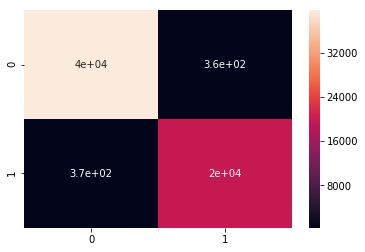

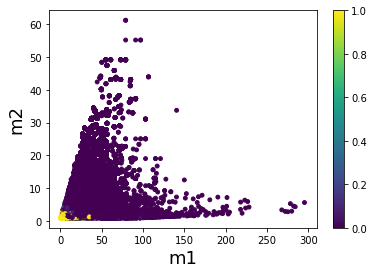

<Figure size 432x288 with 0 Axes>

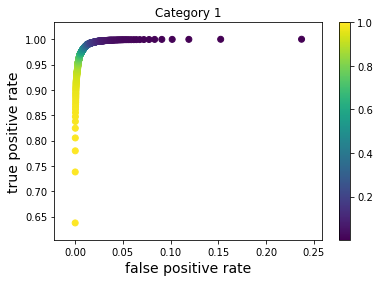

<Figure size 432x288 with 0 Axes>

In [4]:
#Recover last session
RF = classyRF.ClassificationRF()
RF.load_train_dataset(path, fname_x='train_REM.csv')
RF.load_test_dataset(path, fname_x='test_REM.csv')
RF.loadModel(path, 'REM_ind_rec_crossvalidated')
RF.subset_features(independent_recovered_index)
RF.save_plots=True
RF.print_metrics()
RF.analysis_plot(path)

          |  Deep: hasNS   |  Deep: hasREM  ||   RF: hasNS    |   RF: hasREM  ||  KNN: hasNS    |   KNN: hasREM
Threshold |  TP     FP     |  TP     FP     ||  TP     FP     |  TP     FP    ||  TP    FP      |   TP   FP           
0.07      |  0.999  0.144  |  0.995  0.106  ||  0.999  0.118  |  0.998  0.033 ||  1.000  0.000  |   0.994  0.090
0.27      |  0.995  0.096  |  0.979  0.040  ||  0.994  0.076  |  0.992  0.015 ||  0.998  0.134  |   0.981  0.040
0.51      |  0.986  0.061  |  0.949  0.014  ||  0.984  0.048  |  0.981  0.009 ||  0.990  0.072  |   0.953  0.014
0.80      |  0.959  0.028  |  0.894  0.003  ||  0.961  0.020  |  0.959  0.004 ||  0.981  0.053  |   0.904  0.004
0.94      |  0.900  0.010  |  0.822  0.001  ||  0.925  0.007  |  0.925  0.002 ||  0.965  0.034  |   0.850  0.001

In [9]:
i=np.where(RF.thr<0.07)[0][0]
print(RF.thr[i],RF.tpr[i],RF.fpr[i])

0.06833333333333333 0.9975039936102237 0.03285210298496259


# Injected values for reference

Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
mc_inj
q_inj
R_isco_inj
Compactness_inj
snr
Score on testing:  0.9999833330555509
******Confusion matrix******


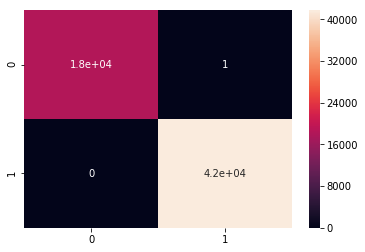

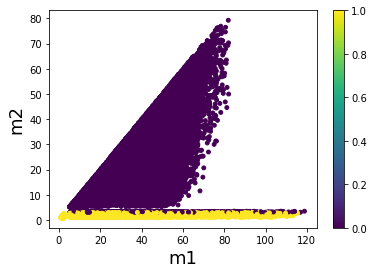

<Figure size 432x288 with 0 Axes>

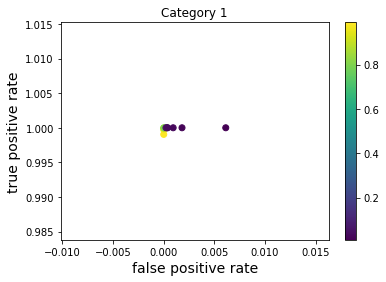

<Figure size 432x288 with 0 Axes>

In [14]:
RFi=classyRF.ClassificationRF()
RFi.load_train_dataset(path, fname_x='train_NS.csv')
RFi.load_test_dataset(path, fname_x='test_NS.csv')
RFi.subset_features(injected_index)
RFi.train()
RFi.save_plots=True
RFi.print_metrics(path)
RFi.analysis_plot(path)

Training and testing using:
m1_inj
m2_inj
chi1_inj
chi2_inj
snr
Score on testing:  0.9999833330555509
******Confusion matrix******


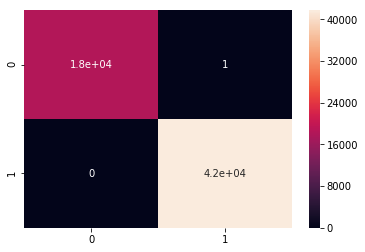

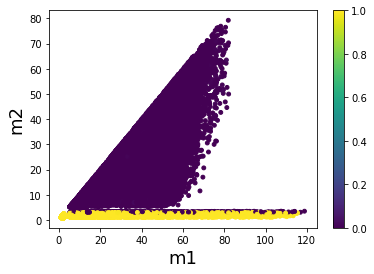

<Figure size 432x288 with 0 Axes>

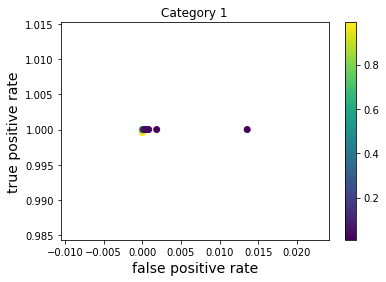

<Figure size 432x288 with 0 Axes>

In [15]:
RFii=classyRF.ClassificationRF()
RFii.load_train_dataset(path, fname_x='train_NS.csv')
RFii.load_test_dataset(path, fname_x='test_NS.csv')
RFii.subset_features(independent_injected_index)
RFii.train()
RFii.save_plots=True
RFii.print_metrics(path)
RFii.analysis_plot(path)

## Crossvalidations done

In [4]:
#Independent recovered
RF = classyRF.ClassificationRF()
RF.load_train_dataset(path, fname_x='train_REM.csv')
RF.load_test_dataset(path, fname_x='test_REM.csv')
RF.subset_features(independent_recovered_index)
optimum = RF.crossvalidation()
RF.train( trees=optimum[0], criterion=optimum[1], max_features=optimum[2])
RF.saveModel(path,'REM_ind_rec_crossvalidated')

Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr
Standard deviation of score during crossvalidation:  0.00019801029710187173 . Mean:  0.9877235453924232
Score  0.9881164686078101 . Optimum forest found:  600  trees,  entropy  criteria and  sqrt  max features


In [16]:
# recovered
RFr=classyRF.ClassificationRF()
RFr.load_train_dataset(path, fname_x='train_NS.csv')
RFr.load_test_dataset(path, fname_x='test_NS.csv')
RFr.subset_features(recovered_index)
optimum = RF.crossvalidation()
RFr.train( trees=optimum[0], criterion=optimum[1], max_features=optimum[2])
RFr.saveModel(path,'rec_crossvalidated')

Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
mc_rec
q_rec
R_isco_rec
Compactness_rec
snr
Standard deviation of score during crossvalidation:  0.0002807499052054315 . Mean:  0.9744466574442907
Score  0.975032917215287 . Optimum forest found:  400  trees,  entropy  criteria and  sqrt  max features


## More types of score

In [5]:
pred=RF.test_prediction

In [6]:
true=RF.labels_test

In [7]:
N=len(true);
tp=0; fp=0; fn=0; tn=0;
for i in range(0,N):
    if true[i]==1:
        if pred[i]==1:
            tp=tp+1
        else:
            fn=fn+1
    else:
        if pred[i]==1:
            fp=fp+1
        else:
            tn=tn+1
tpr=tp/N; fpr=fp/N; fnr=fn/N; tnr=tn/N;            

In [8]:
print(tp,fp,fn,tn)
print(tpr,fpr,fnr,tnr)

19662 358 370 39609
0.32770546175769594 0.005966766112768546 0.0061667694461574355 0.6601610026833781


In [9]:
sensitivity=tpr/(tpr+fnr)
precision=tpr/(tpr+fpr)
f1score=2*(precision*sensitivity)/(precision+sensitivity)
print(sensitivity,precision,f1score)

0.9815295527156549 0.9821178821178822 0.9818236292819336
